In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Jaydeep/OneDrive/Desktop/tirth/Crop_Production_Data.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Visulization

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [5]:
print(df.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [6]:
df['Crop_Year'] = df['Crop_Year'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Production'] = df['Production'].astype(float)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
yearly_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

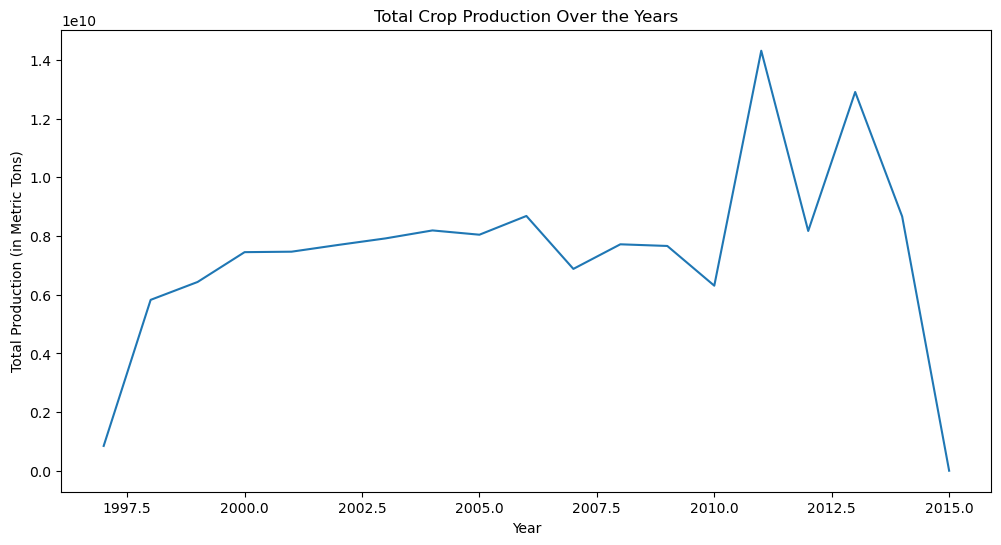

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=yearly_production)
plt.title('Total Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production (in Metric Tons)')
plt.show()

In [10]:
state_production = df.groupby('State_Name')['Production'].sum().reset_index()

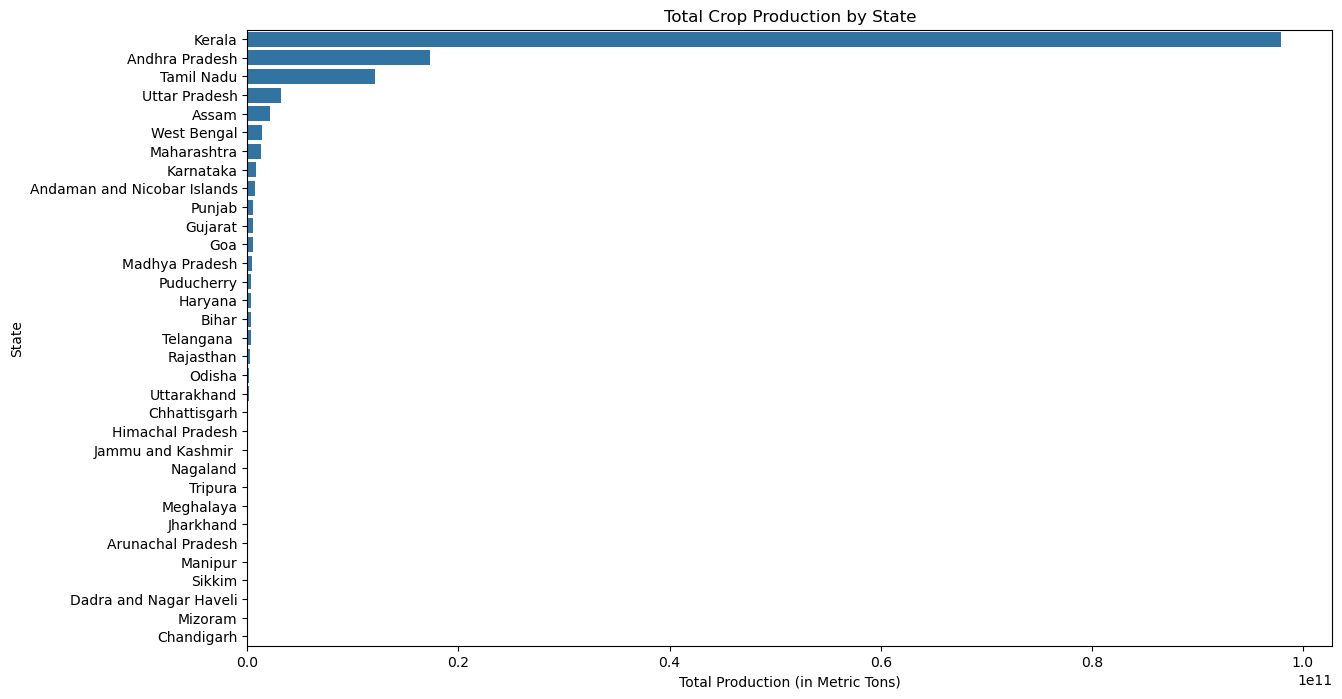

In [11]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Production', y='State_Name', data=state_production.sort_values('Production', ascending=False))
plt.title('Total Crop Production by State')
plt.xlabel('Total Production (in Metric Tons)')
plt.ylabel('State')
plt.show()

In [12]:
season_production = df.groupby('Season')['Production'].sum().reset_index()

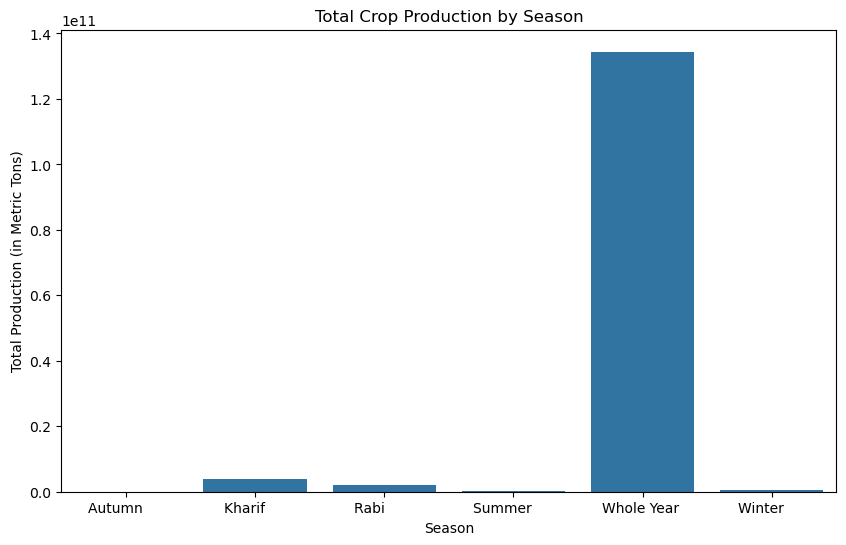

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Production', data=season_production)
plt.title('Total Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production (in Metric Tons)')
plt.show()

# Dahboard

In [23]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set default Plotly theme
pio.templates.default = 'plotly_dark'

# Load the dataset
df = pd.read_csv("C:/Users/Jaydeep/OneDrive/Desktop/tirth/Crop_Production_Data.csv")

# Data preprocessing
df['Crop_Year'] = df['Crop_Year'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Production'] = df['Production'].astype(float)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1('Crop Production Analysis in India', style={'textAlign': 'center', 'color': '#FF6347'}),
    
    html.Div([
        html.Label('Select State:', style={'fontSize': 18, 'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='state-dropdown',
            options=[{'label': state, 'value': state} for state in df['State_Name'].unique()],
            value=df['State_Name'].unique()[0],
            style={'width': '60%', 'padding': '3px', 'fontSize': 16}
        )
    ], style={'width': '50%', 'padding': '10px', 'margin': 'auto'}),
    
    html.Div([
        html.Div([
            dcc.Graph(id='production-over-years', style={'height': '50vh'}),
        ], className='card', style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Graph(id='production-by-crop', style={'height': '50vh'}),
        ], className='card', style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '20px'}),
    
    html.Div([
        html.Div([
            dcc.Graph(id='production-by-season', style={'height': '50vh'}),
        ], className='card', style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Graph(id='avg-production-by-crop', style={'height': '50vh'}),
        ], className='card', style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Graph(id='avg-production-by-season', style={'height': '50vh'}),
        ], className='card', style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'space-between', 'padding': '20px'}),
    
    html.Div([
        html.Div(id='key-metrics', style={'display': 'flex', 'justifyContent': 'space-around', 'padding': '20px'}),
    ])
], style={'backgroundColor': '#f9f9f9'})

# Callbacks to update graphs based on user input
@app.callback(
    [Output('production-over-years', 'figure'),
     Output('production-by-crop', 'figure'),
     Output('production-by-season', 'figure'),
     Output('avg-production-by-crop', 'figure'),
     Output('avg-production-by-season', 'figure'),
     Output('key-metrics', 'children')],
    [Input('state-dropdown', 'value')]
)
def update_graphs(selected_state):
    # Filter data based on selected state
    state_data = df[df['State_Name'] == selected_state]

    # Total production over the years
    yearly_production = state_data.groupby('Crop_Year')['Production'].sum().reset_index()
    fig_yearly_production = px.line(yearly_production, x='Crop_Year', y='Production', 
                                    title='Total Production Over Years', 
                                    color_discrete_sequence=['#1f77b4'], markers=True)

    # Production by crop
    crop_production = state_data.groupby('Crop')['Production'].sum().reset_index()
    fig_crop_production = px.bar(crop_production, x='Crop', y='Production', 
                                title='Production by Crop', 
                                color='Production', color_continuous_scale=px.colors.sequential.Plasma)

    # Production by season
    season_production = state_data.groupby('Season')['Production'].sum().reset_index()
    fig_season_production = px.bar(season_production, x='Season', y='Production', 
                                  title='Production by Season', 
                                  color='Production', color_continuous_scale=px.colors.sequential.Inferno)

    # Average production by crop
    avg_production_crop = state_data.groupby('Crop')['Production'].mean().reset_index()
    fig_avg_production_crop = px.bar(avg_production_crop, x='Crop', y='Production', 
                                     title='Average Production by Crop', 
                                     color='Production', color_continuous_scale=px.colors.sequential.Cividis)

    # Average production by season
    avg_production_season = state_data.groupby('Season')['Production'].mean().reset_index()
    fig_avg_production_season = px.bar(avg_production_season, x='Season', y='Production', 
                                       title='Average Production by Season', 
                                       color='Production', color_continuous_scale=px.colors.sequential.Turbo)

    # Key metrics
    avg_production_per_area_by_crop = state_data.groupby('Crop').apply(
        lambda x: (x['Production'].sum() / x['Area'].sum()) if x['Area'].sum() > 0 else 0
    ).reset_index(name='Avg_Production_Per_Area')

    # Create metrics cards
    metrics_cards = []
    for _, row in avg_production_per_area_by_crop.iterrows():
        metrics_cards.append(
            html.Div([
                html.H3(f'{row["Crop"]}: {row["Avg_Production_Per_Area"]:.2f} MT/ha', style={'color': '#1f77b4'}),
            ], className='metric-card', style={'padding': '10px', 'backgroundColor': '#ffffff', 'borderRadius': '10px', 'boxShadow': '0px 4px 8px rgba(0,0,0,0.1)', 'width': '30%'})
        )

    return fig_yearly_production, fig_crop_production, fig_season_production, fig_avg_production_crop, fig_avg_production_season, metrics_cards

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\Jaydeep\AppData\Local\Temp\ipykernel_8952\4255661531.py:110: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Jaydeep\AppData\Local\Temp\ipykernel_8952\4255661531.py:110: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# Open your browser to http://127.0.0.1:8050 to see the Dashboard